## Hypothesis Testing 

### Case Study: Coffee Consumption per day (Proportion)
74% of the people in the nation drink coffee everyday ([*Source](https://www.driveresearch.com/market-research-company-blog/coffee-survey/#:~:text=3%20in%204%20Americans%20drink,drinking%20coffee%20benefits%20their%20health)).<br>
We want to check the claim:<br>
- Less than 74% of people drink coffee everyday. 
- More than 74% of people drink coffee everyday.

<span style="font-size:larger;"><b><u>Step 1 - Libraries</u></b></span>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

<span style="font-size:larger;"><b><u>Step 2 - Data</u></b></span>

#### How many people in our class drink coffee everyday?<br> More or less than 74%?

- [x] Less than 74% of people drink coffee everyday. (Left-Tailed Test)
- [ ] More than 74% of people drink coffee everyday. (Right-Tailed Test)

<b>Left-Tailed Test:</b><br>
<b>Null Hypothesis (H0):</b> 74% of people drink coffee everyday.<br>
$H_{0}$: $p$ = 0.74 <br>
<b>Alternative Hypothesis (Ha):</b> Less than 74% of people drink coffee everyday.<br>
$H_{1}$: $p <$ 0.74


<b>Right-Tailed Test:</b><br>
<b>Null Hypothesis (H0):</b> 74% of people drink coffee everyday.<br>
$H_{0}$: $p$ = 0.74 <br>
<b>Alternative Hypothesis (Ha):</b> More than 74% of people drink coffee everyday.<br>
$H_{1}$: $p >$ 0.74

In [2]:
drink_coffee = 16  # number of people drink coffee in our class
proportion_of_class = drink_coffee/23 # Sample Proportion
population_proportion = .74 #National Proportion
alpha = .05   #Significance Level
sample_size = 23

A 5% significance level means that when we reject a null hypothesis:
We expect to reject a true null hypothesis 5 out of 100 times.

<span style="font-size:larger;"><b><u>Step 3 - Calculate the test statistic</u></b></span>

In [3]:
standard_error = ((population_proportion * (1 - population_proportion))/sample_size) ** 0.5
standard_error

0.09146156237078146

Standard Error is used to calculate the Z-Score.<br>
We'll use the z-test for proportions.

In [4]:
z_score = (proportion_of_class - population_proportion) / standard_error
z_score

-0.4848793847099642

Critical Z-value for an signicicant level (fixed value):<br>
Critical values define the rejection region for the test

In [5]:
# left-tailed
print(stats.norm.ppf(0.05))
# right-tailed
print(stats.norm.ppf(1-0.05))

-1.6448536269514729
1.6448536269514722


We can also define this through p-value.

In [6]:
# If right-tailed
# p_value = 1- stats.norm.cdf(z_score)
# Left-tailed below
p_value = stats.norm.cdf(z_score)
p_value

0.31388095333741295

In [7]:
print(f"z = {round(z_score, 3)}, p = {(p_value)}")
if p_value < 0.05:
    print("We Reject the Null Hypothese ")
else:
    print('We fail to reject the Null Hypothese')

z = -0.485, p = 0.31388095333741295
We fail to reject the Null Hypothese


<span style="font-size:larger;"><b><u>Step 4 - Conclusion</u></b></span>

For left tailed case, our z-score > the critical value -1.64 and p-value > 0.05, so we fail to reject the Null.<br>

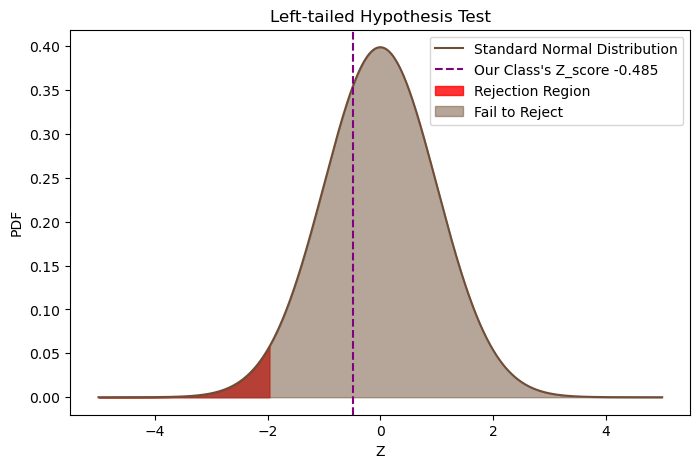

In [8]:
mu = 0  
alpha = 0.05  # Example alpha level
z_score = round(z_score, 3)
# Create an array of x values (for the standard normal distribution)
x = np.linspace(-5, 5, 1000)
# Generate the PDF for the standard normal distribution
pdf = stats.norm.pdf(x, mu, 1)
# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
# Plot the normal distribution
plt.plot(x, pdf, color = '#6f4e37' ,label='Standard Normal Distribution')
# Plot your z_score
plt.axvline(x=z_score, color='purple', linestyle='--', label=f"""Our Class's Z_score {z_score}""")
# Shade the rejection regions
critical_value_left = stats.norm.ppf(alpha/2)
critical_value_right = stats.norm.ppf(1 - alpha/2)
plt.fill_between(x, pdf, where=(x < critical_value_left), color='red', alpha=.8, label='Rejection Region')
plt.fill_between(x, pdf, where=(x > critical_value_left) | (x < critical_value_right), color='#6f4e37', alpha=0.5, label='Fail to Reject')
# Adjustments to the plot
plt.title('Left-tailed Hypothesis Test')
plt.xlabel('Z')
plt.ylabel('PDF')
plt.legend()
plt.grid(False)
plt.show()

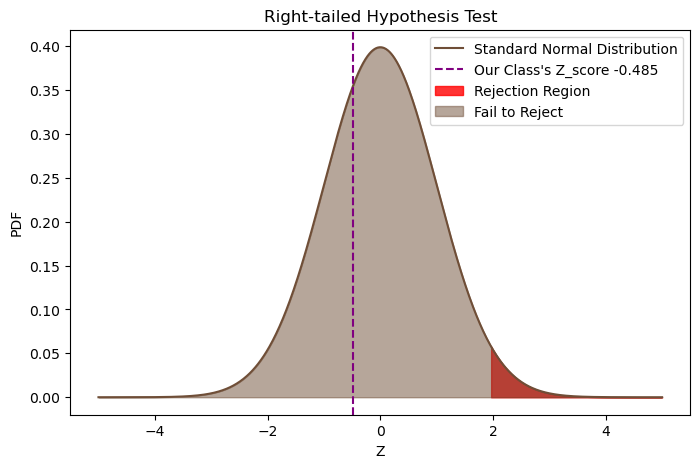

In [9]:
#Right-tailed plot
mu = 0  
alpha = 0.05  # Example alpha level
z_score = round(z_score, 3)
# Create an array of x values (for the standard normal distribution)
x = np.linspace(-5, 5, 1000)
# Generate the PDF for the standard normal distribution
pdf = stats.norm.pdf(x, mu, 1)
# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
# Plot the normal distribution
plt.plot(x, pdf, color = '#6f4e37' ,label='Standard Normal Distribution')
# Plot your z_score
plt.axvline(x=z_score, color='purple', linestyle='--', label=f"""Our Class's Z_score {z_score}""")
# Shade the rejection regions
critical_value_left = stats.norm.ppf(alpha/2)
critical_value_right = stats.norm.ppf(1 - alpha/2)
plt.fill_between(x, pdf, where=(x > critical_value_right), color='red', alpha=.8, label='Rejection Region')
plt.fill_between(x, pdf, where=(x > critical_value_left) | (x < critical_value_right), color='#6f4e37', alpha=0.5, label='Fail to Reject')
# Adjustments to the plot
plt.title('Right-tailed Hypothesis Test')
plt.xlabel('Z')
plt.ylabel('PDF')
plt.legend()
plt.grid(False)
plt.show()